In [1]:
import pandas as pd
import geopandas as gp
import fiona
import glob
import contextily as ctx
print(glob.glob("data/**"))
print(glob.glob("data/**/**"))

/usr/local/lib/python3.8/dist-packages/geopandas/_compat.py:84: UserWarning: The Shapely GEOS version (3.8.0-CAPI-1.13.1 ) is incompatible with the GEOS version PyGEOS was compiled with (3.8.1-CAPI-1.13.3). Conversions between both will be slow.
  warnings.warn(


['data/sa2_2020.gdb.zip', 'data/Christchurch']
['data/Christchurch/ValuationHubLandUseValuesLGOIMA788408.gdb.zip', 'data/Christchurch/New Zealand-christchurch-city_Monthly_Match_2020-11-13.csv']


In [2]:
fiona.listlayers('data/Christchurch/ValuationHubLandUseValuesLGOIMA788408.gdb.zip')

['CCCReVal2007', 'CCCReVal2013', 'CCCReVal2016', 'CCCReVal2019']

In [3]:
CCCReVal2019 = gp.read_file("data/Christchurch/ValuationHubLandUseValuesLGOIMA788408.gdb.zip", layer="CCCReVal2019")
CCCReVal2019

,ValueId,ValueType,FullStreetNumber,StreetNumber,RoadName,RoadExtension,RoadNameFull,Suburb,HighestAndBestUseDescription,LandUseDescription,CapitalValue,LandValue,ImprovementsValue,NatureOfImprovement,ValuationRollNumber,AlphaID,VisitOrder,GeneralValuationDate,geometry
0,2016860,Revaluation,80,80,CHAPMANS,ROAD,CHAPMANS ROAD,None,"Energy, including electricity and gas distribu...",UTILITY SERVICES - Gas,360000,0,360000,OI ...,99960,,1400,20190801000000,None
1,2038843,Revaluation,,0,City Wide Infrastructure,,City Wide Infrastructure,None,"Energy, including electricity and gas distribu...",UTILITY SERVICES - Electricity,9140000,0,9140000,OI ...,99960,,700,20190801000000,None
2,2078055,Revaluation,,0,City Wide Infrastructure,,City Wide Infrastructure,None,"Energy, including electricity and gas distribu...",UTILITY SERVICES - Gas,41000000,0,41000000,OI PIPES ...,99960,,900,20190801000000,None
3,2046587,Revaluation,,0,City Wide Infrastructure,,City Wide Infrastructure,None,"Energy, including electricity and gas distribu...",UTILITY SERVICES - Gas,4270000,0,4270000,OI PIPES ...,99960,,1000,20190801000000,None
4,2054296,Revaluation,,0,City Wide Infrastructure,,City Wide Infrastructure,None,"Energy, including electricity and gas distribu...",UTILITY SERVICES - Electricity,540000,0,540000,OI ...,99960,,801,20190801000000,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174344,2129026,Revaluation,102,102,MAJOR HORNBROOK,ROAD,MAJOR HORNBROOK ROAD,Mount Pleasant,Vacant land which when developed will have a c...,COMMERCIAL - Vacant,75000,75000,0,None,22901,,28701,20190801000000,POINT (1577047.967 5176597.580)
174345,2064198,Revaluation,102A,102,MAJOR HORNBROOK,ROAD,MAJOR HORNBROOK ROAD,Mount Pleasant,Vacant land which when developed will have a c...,COMMERCIAL - Vacant,45000,45000,0,None,22901,,28702,20190801000000,POINT (1577048.715 5176591.135)
174346,2171706,Revaluation,104,104,MAJOR HORNBROOK,ROAD,MAJOR HORNBROOK ROAD,Mount Pleasant,Vacant land which when developed will have a c...,COMMERCIAL - Vacant,45000,45000,0,None,22901,,28703,20190801000000,POINT (1577047.959 5176585.085)
174347,2057718,Revaluation,104A,104,MAJOR HORNBROOK,ROAD,MAJOR HORNBROOK ROAD,Mount Pleasant,Vacant land which when developed will have a c...,COMMERCIAL - Vacant,45000,45000,0,None,22901,,28704,20190801000000,POINT (1577046.471 5176578.775)


In [4]:
CCCReVal2019 = CCCReVal2019[~CCCReVal2019.geometry.isna()]
CCCReVal2019 = CCCReVal2019.to_crs(epsg=3857)

In [5]:
CCCReVal2019.LandUseDescription.value_counts()

RESIDENTIAL - Single Unit excluding bach                   135004
RESIDENTIAL - Vacant                                         7943
RECREATIONAL - Passive Outdoor                               5530
RESIDENTIAL - Multi-unit                                     4600
INDUSTRIAL - Other Industries including storage              2586
                                                            ...  
COMMUNITY SERVICES - Defence                                    5
MULTI-USE AT PRIMARY LEVEL - Major use - Transport              4
TRANSPORT - Multi-use within Transport                          4
MULTI-USE AT PRIMARY LEVEL - Major use - Rural Industry         3
MULTI-USE AT PRIMARY LEVEL - Major use - Lifestyle              3
Name: LandUseDescription, Length: 82, dtype: int64

In [6]:
CCCReVal2019["LandUse"] = CCCReVal2019.LandUseDescription.apply(lambda s: s.split("-")[0].strip())
CCCReVal2019["LandUse"].value_counts()

RESIDENTIAL           149914
RECREATIONAL            6146
INDUSTRIAL              5719
COMMERCIAL              4821
UTILITY SERVICES        2529
LIFESTYLE               2488
COMMUNITY SERVICES      1040
RURAL INDUSTRY          1037
MULTI                    401
TRANSPORT                236
Name: LandUse, dtype: int64

In [7]:
res = CCCReVal2019[CCCReVal2019["LandUse"] == "RESIDENTIAL"]
display(res)
res.LandUseDescription.value_counts()

,ValueId,ValueType,FullStreetNumber,StreetNumber,RoadName,RoadExtension,RoadNameFull,Suburb,HighestAndBestUseDescription,LandUseDescription,CapitalValue,LandValue,ImprovementsValue,NatureOfImprovement,ValuationRollNumber,AlphaID,VisitOrder,GeneralValuationDate,geometry,LandUse
18,2034478,Revaluation,180,180,PRESTONS,ROAD,PRESTONS ROAD,Marshland,Bare land which has an immediate potential for...,RESIDENTIAL - Vacant,3200000,3150000,50000,DWG GRANNYFLAT OBS OI ...,21800,,300,20190801000000,POINT (19217735.448 -5384601.084),RESIDENTIAL
19,2130997,Revaluation,190,190,PRESTONS,ROAD,PRESTONS ROAD,Marshland,Bare land which has an immediate potential for...,RESIDENTIAL - Vacant,1630000,1530000,100000,DWG OBS OI ...,21800,,500,20190801000000,POINT (19218017.786 -5384677.334),RESIDENTIAL
20,2100814,Revaluation,849,849,HILLS,ROAD,HILLS ROAD,Marshland,Bare land which has an immediate potential for...,RESIDENTIAL - Vacant,1740000,1700000,40000,DWG FG OBS OI ...,21800,,600,20190801000000,POINT (19218351.880 -5384600.131),RESIDENTIAL
21,2034479,Revaluation,829,829,HILLS,ROAD,HILLS ROAD,Marshland,Bare land which has an immediate potential for...,RESIDENTIAL - Vacant,1600000,1500000,100000,DWG OBS OI ...,21800,,700,20190801000000,POINT (19218220.645 -5384766.518),RESIDENTIAL
22,2155557,Revaluation,815,815,HILLS,ROAD,HILLS ROAD,Marshland,Bare land which has an immediate potential for...,RESIDENTIAL - Vacant,2100000,1950000,150000,DWG FG OBS OI ...,21800,,800,20190801000000,POINT (19218101.639 -5384916.048),RESIDENTIAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174322,2126636,Revaluation,117,117,Prestons Park,Drive,Prestons Park Drive,Marshland,Vacant land on which typically a single dwelli...,RESIDENTIAL - Vacant,265000,265000,0,None,21823,,73945,20190801000000,POINT (19221418.175 -5386002.581),RESIDENTIAL
174323,2045672,Revaluation,115,115,Prestons Park,Drive,Prestons Park Drive,Marshland,Vacant land on which typically a single dwelli...,RESIDENTIAL - Vacant,265000,265000,0,None,21823,,73946,20190801000000,POINT (19221434.647 -5385974.562),RESIDENTIAL
174324,2134060,Revaluation,133,133,Prestons Park,Drive,Prestons Park Drive,Marshland,Bare land which has an immediate potential for...,RESIDENTIAL - Vacant,4880000,4880000,0,None,21823,,73947,20190801000000,POINT (19221561.501 -5386123.268),RESIDENTIAL
174328,2184313,Revaluation,26,26,LINCOLN,ROAD,LINCOLN ROAD,Hillmorton,Dwelling houses of a fully detached or semi-de...,RESIDENTIAL - Single Unit excluding bach,395000,117000,278000,DWG OBS OI ...,22621,C,45300,20190801000000,POINT (19213329.663 -5396539.452),RESIDENTIAL


RESIDENTIAL - Single Unit excluding bach                   135004
RESIDENTIAL - Vacant                                         7943
RESIDENTIAL - Multi-unit                                     4600
RESIDENTIAL - Bach                                           1353
RESIDENTIAL - Public Communal - Unlicensed                    483
RESIDENTIAL - Special Accommodation                           244
RESIDENTIAL - Multi-use within Residential                    159
RESIDENTIAL - Car parking                                      70
RESIDENTIAL - Public Communal - Licensed                       42
RESIDENTIAL - Communal Residence Dependant on other use        16
Name: LandUseDescription, dtype: int64

In [8]:
for k,v in res.LandUseDescription.value_counts().iteritems():
    print(k, v)
    print(res[res.LandUseDescription == k].HighestAndBestUseDescription.value_counts().index[0])

RESIDENTIAL - Single Unit excluding bach 135004
Dwelling houses of a fully detached or semi-detached style situated on their own clearly defined piece of land
RESIDENTIAL - Vacant 7943
Vacant land on which typically a single dwelling house will be built
RESIDENTIAL - Multi-unit 4600
Ownership home units which may be single storey or multi-storey and which do not have the appearance of dwelling houses.(eg typical sausage type units)
RESIDENTIAL - Bach 1353
Dwelling houses of a fully detached or semi-detached style situated on their own clearly defined piece of land
RESIDENTIAL - Public Communal - Unlicensed 483
Commercial accommodation such as motels and hotels
RESIDENTIAL - Special Accommodation 244
Rest homes for elderly
RESIDENTIAL - Multi-use within Residential 159
Home and income. The dwelling is the predominant use and there is an additional unit of use attached to, or associated with, the dwelling house which can be used to produce income
RESIDENTIAL - Car parking 70
Parking buil

In [9]:
res = res[res.LandUseDescription.isin(["RESIDENTIAL - Single Unit excluding bach", "RESIDENTIAL - Multi-unit", "RESIDENTIAL - Bach"])]
display(res)

,ValueId,ValueType,FullStreetNumber,StreetNumber,RoadName,RoadExtension,RoadNameFull,Suburb,HighestAndBestUseDescription,LandUseDescription,CapitalValue,LandValue,ImprovementsValue,NatureOfImprovement,ValuationRollNumber,AlphaID,VisitOrder,GeneralValuationDate,geometry,LandUse
30,2084009,Revaluation,579,579,HILLS,ROAD,HILLS ROAD,Marshland,Dwelling houses of a fully detached or semi-de...,RESIDENTIAL - Single Unit excluding bach,510000,320000,190000,DWG OBS OI ...,21800,,2500,20190801000000,POINT (19219318.121 -5386280.622),RESIDENTIAL
32,2138703,Revaluation,163,163,QUEEN ELIZABETH II,DRIVE,QUEEN ELIZABETH II DRIVE,Mairehau,Dwelling houses of a fully detached or semi-de...,RESIDENTIAL - Single Unit excluding bach,650000,290000,360000,DWG OBS OI ...,21800,,3000,20190801000000,POINT (19217688.034 -5386509.801),RESIDENTIAL
34,2183021,Revaluation,143,143,WINTERS,ROAD,WINTERS ROAD,Mairehau,Dwelling houses of a fully detached or semi-de...,RESIDENTIAL - Single Unit excluding bach,370000,265000,105000,DWG OI ...,21800,,3102,20190801000000,POINT (19217155.065 -5386518.738),RESIDENTIAL
39,2183022,Revaluation,250,250,PRESTONS,ROAD,PRESTONS ROAD,Marshland,Dwelling houses of a fully detached or semi-de...,RESIDENTIAL - Multi-unit,1330000,335000,995000,DWG OBS OFFICE OI ...,21800,,12300,20190801000000,POINT (19218967.796 -5384615.667),RESIDENTIAL
41,2149568,Revaluation,264,264,PRESTONS,ROAD,PRESTONS ROAD,Marshland,Dwelling houses of a fully detached or semi-de...,RESIDENTIAL - Single Unit excluding bach,425000,205000,220000,DWG OBS OI ...,21800,,12600,20190801000000,POINT (19219195.204 -5384563.285),RESIDENTIAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174308,2154774,Revaluation,569B,569,HEREFORD,STREET,HEREFORD STREET,Linwood,Ownership home units which may be single store...,RESIDENTIAL - Single Unit excluding bach,340000,132000,208000,FLAT OI ...,22441,,2502,20190801000000,POINT (19221112.876 -5393259.196),RESIDENTIAL
174309,2055045,Revaluation,569C,569,HEREFORD,STREET,HEREFORD STREET,Linwood,Ownership home units which may be single store...,RESIDENTIAL - Single Unit excluding bach,345000,132000,213000,FLAT OI ...,22441,,2503,20190801000000,POINT (19221112.415 -5393234.664),RESIDENTIAL
174310,2023878,Revaluation,54,54,AVONHEAD,ROAD,AVONHEAD ROAD,Avonhead,Dwelling houses of a fully detached or semi-de...,RESIDENTIAL - Single Unit excluding bach,630000,420000,210000,DWG OBS OI ...,21896,,73100,20190801000000,POINT (19209313.805 -5392194.987),RESIDENTIAL
174328,2184313,Revaluation,26,26,LINCOLN,ROAD,LINCOLN ROAD,Hillmorton,Dwelling houses of a fully detached or semi-de...,RESIDENTIAL - Single Unit excluding bach,395000,117000,278000,DWG OBS OI ...,22621,C,45300,20190801000000,POINT (19213329.663 -5396539.452),RESIDENTIAL


In [10]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)
res.LandValue.describe()

count     140957.00000
mean      238711.58651
std       171507.64401
min          100.00000
25%       145000.00000
50%       200000.00000
75%       275000.00000
max     10050000.00000
Name: LandValue, dtype: float64

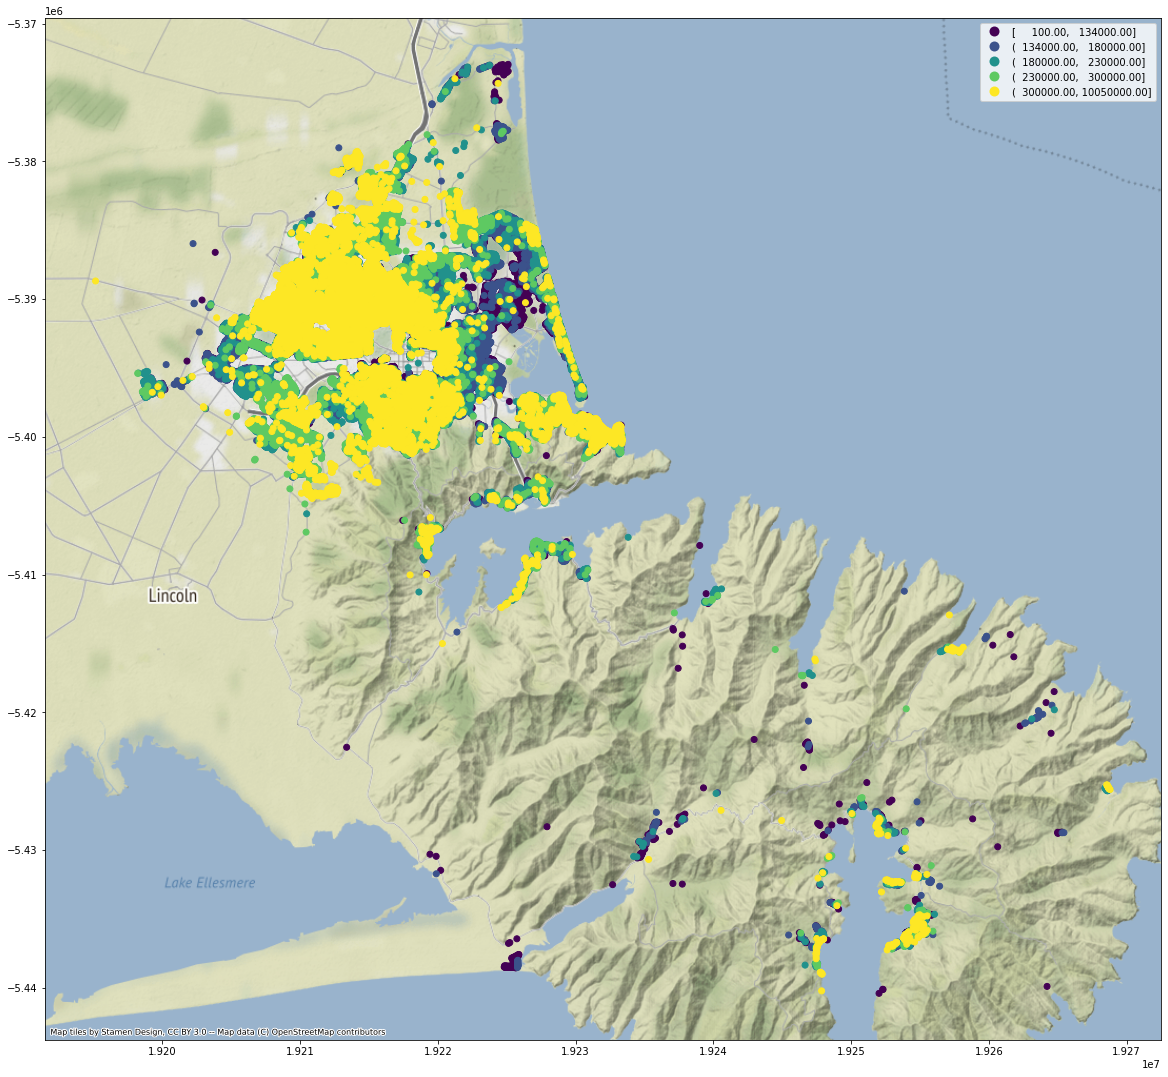

In [11]:
ax = res.sort_values(by="LandValue").plot(column='LandValue', scheme='quantiles', legend=True, figsize=(20,20))
ctx.add_basemap(ax)

In [12]:
df = pd.read_csv("data/Christchurch/New Zealand-christchurch-city_Monthly_Match_2020-11-13.csv")
airbnb = gp.GeoDataFrame(df, geometry=gp.points_from_xy(df.Longitude, df.Latitude))
airbnb = airbnb.set_crs(epsg=4326).to_crs(epsg=3857)
pd.set_option('display.max_columns', None)
airbnb

,Property ID,Property Type,Listing Type,Bedrooms,Reporting Month,Occupancy Rate,Revenue (USD),Revenue (Native),ADR (USD),ADR (Native),Number of Reservations,Reservation Days,Available Days,Blocked Days,Country,State,City,Zipcode,Neighborhood,Metropolitan Statistical Area,Latitude,Longitude,Active,Scraped During Month,Currency Native,Airbnb Property ID,Airbnb Host ID,HomeAway Property ID,HomeAway Property Manager,geometry
0,ab-24564192,Townhouse,Private room,1.00000,2018-06-01,0.00000,0.00000,0.00000,nan,nan,0,0,30,0,New Zealand,Canterbury,Christchurch City,nan,nan,nan,-43.51607,172.54478,True,True,NZD,24564192.00000,185294275.00000,NaN,NaN,POINT (19207597.101 -5390855.211)
1,ab-24564192,Townhouse,Private room,1.00000,2018-07-01,0.00000,0.00000,0.00000,nan,nan,0,0,31,0,New Zealand,Canterbury,Christchurch City,nan,nan,nan,-43.51607,172.54478,True,True,NZD,24564192.00000,185294275.00000,NaN,NaN,POINT (19207597.101 -5390855.211)
2,ab-24564192,Townhouse,Private room,1.00000,2018-08-01,0.00000,0.00000,0.00000,nan,nan,0,0,31,0,New Zealand,Canterbury,Christchurch City,nan,nan,nan,-43.51607,172.54478,True,True,NZD,24564192.00000,185294275.00000,NaN,NaN,POINT (19207597.101 -5390855.211)
3,ab-24564192,Townhouse,Private room,1.00000,2018-09-01,0.03300,22.00000,33.00000,22.00000,33.00000,1,1,29,0,New Zealand,Canterbury,Christchurch City,nan,nan,nan,-43.51607,172.54478,True,True,NZD,24564192.00000,185294275.00000,NaN,NaN,POINT (19207597.101 -5390855.211)
4,ab-24564192,Townhouse,Private room,1.00000,2018-10-01,0.00000,0.00000,0.00000,nan,nan,0,0,31,0,New Zealand,Canterbury,Christchurch City,nan,nan,nan,-43.51607,172.54478,False,False,NZD,24564192.00000,185294275.00000,NaN,NaN,POINT (19207597.101 -5390855.211)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
224750,ha-9464818ha,House,Entire home/apt,3.00000,2020-06-01,0.00000,0.00000,nan,nan,nan,0,0,0,30,New Zealand,Canterbury,Christchurch City,nan,nan,nan,-43.56092,172.71883,False,True,NaN,nan,nan,9464818ha,NaN,POINT (19226971.761 -5397743.228)
224751,ha-9464818ha,House,Entire home/apt,3.00000,2020-07-01,0.00000,0.00000,nan,nan,nan,0,0,6,25,New Zealand,Canterbury,Christchurch City,nan,nan,nan,-43.56092,172.71883,True,True,NaN,nan,nan,9464818ha,NaN,POINT (19226971.761 -5397743.228)
224752,ha-9464818ha,House,Entire home/apt,3.00000,2020-08-01,0.00000,0.00000,nan,nan,nan,0,0,0,31,New Zealand,Canterbury,Christchurch City,nan,nan,nan,-43.56092,172.71883,False,True,NaN,nan,nan,9464818ha,NaN,POINT (19226971.761 -5397743.228)
224753,ha-9464818ha,House,Entire home/apt,3.00000,2020-09-01,0.00000,0.00000,nan,nan,nan,0,0,0,30,New Zealand,Canterbury,Christchurch City,nan,nan,nan,-43.56092,172.71883,False,False,NaN,nan,nan,9464818ha,NaN,POINT (19226971.761 -5397743.228)


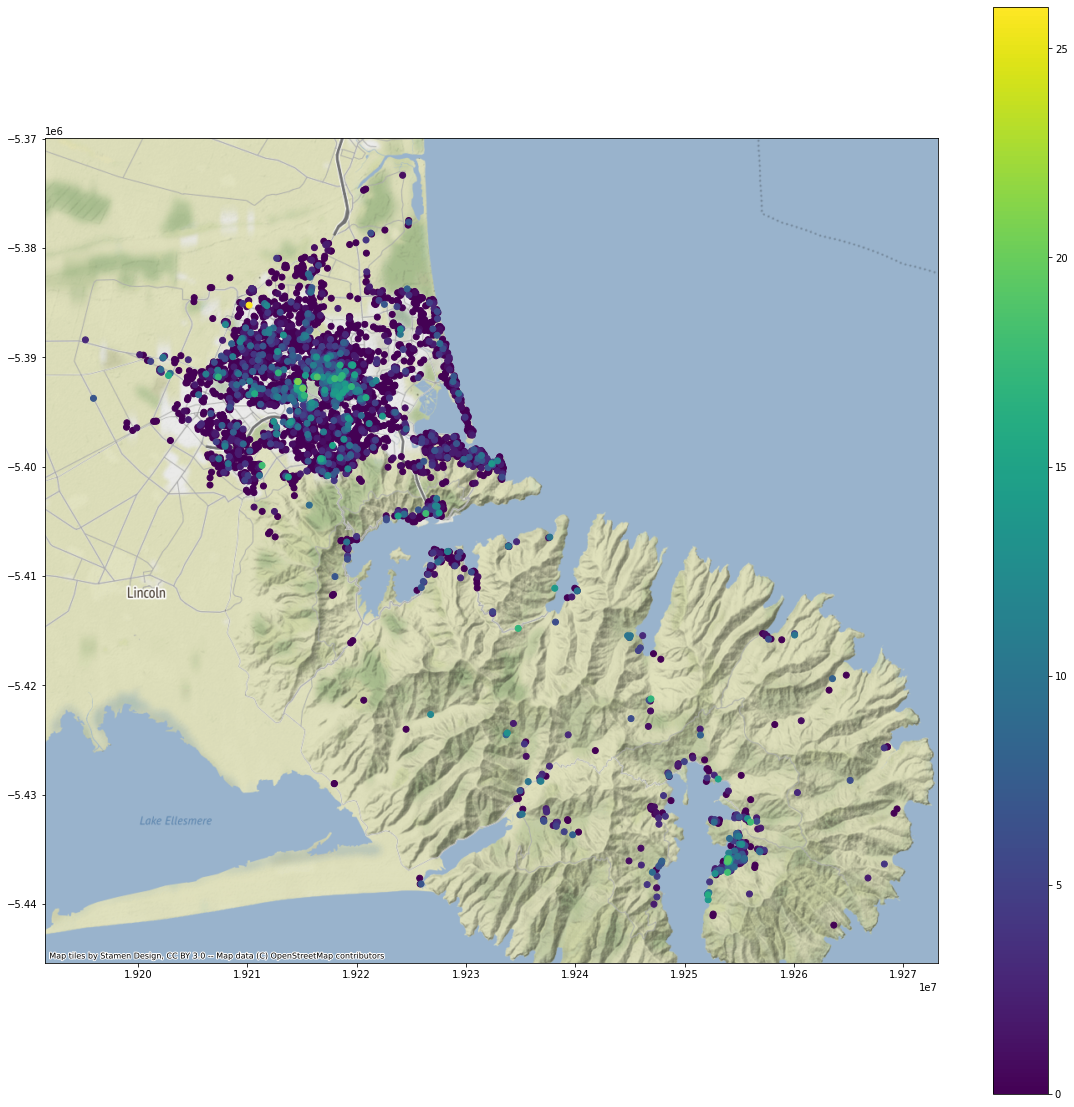

In [13]:
ax = airbnb[airbnb["Reporting Month"] == "2020-10-01"].sort_values(by="Number of Reservations").plot(column='Number of Reservations', legend=True, figsize=(20,20))
ctx.add_basemap(ax)

In [14]:
airbnb.columns

Index(['Property ID', 'Property Type', 'Listing Type', 'Bedrooms',
       'Reporting Month', 'Occupancy Rate', 'Revenue (USD)',
       'Revenue (Native)', 'ADR (USD)', 'ADR (Native)',
       'Number of Reservations', 'Reservation Days', 'Available Days',
       'Blocked Days', 'Country', 'State', 'City', 'Zipcode', 'Neighborhood',
       'Metropolitan Statistical Area', 'Latitude', 'Longitude', 'Active',
       'Scraped During Month', 'Currency Native', 'Airbnb Property ID',
       'Airbnb Host ID', 'HomeAway Property ID', 'HomeAway Property Manager',
       'geometry'],
      dtype='object')

<AxesSubplot:>

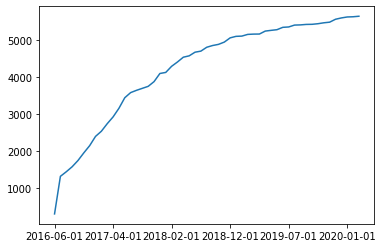

In [15]:
airbnb["Reporting Month"].value_counts().sort_values().plot()

In [16]:
sa2 = gp.read_file("data/sa2_2020.gdb.zip")
sa2

,SA22020_V1_00,SA22020_V1_00_NAME,SA22020_V1_00_NAME_ASCII,LAND_AREA_SQ_KM,AREA_SQ_KM,SHAPE_Length,geometry
0,100100,North Cape,North Cape,829.08171,829.08171,415962.27610,"MULTIPOLYGON (((1567022.256 6185741.265, 15670..."
1,100200,Rangaunu Harbour,Rangaunu Harbour,273.93648,273.93648,149155.42005,"MULTIPOLYGON (((1624517.242 6128488.368, 16245..."
2,100300,Inlets Far North District,Inlets Far North District,0.00000,626.10112,1358870.37858,"MULTIPOLYGON (((1666947.690 6126687.578, 16669..."
3,100400,Karikari Peninsula,Karikari Peninsula,174.18810,174.18810,140012.37039,"MULTIPOLYGON (((1636163.048 6151520.935, 16361..."
4,100500,Tangonge,Tangonge,177.09845,177.09845,101331.82160,"MULTIPOLYGON (((1615865.103 6109920.357, 16154..."
...,...,...,...,...,...,...,...
2250,362300,Kennington-Tisbury,Kennington-Tisbury,36.98339,36.98339,38816.53342,"MULTIPOLYGON (((1246757.001 4849353.288, 12467..."
2251,362400,Newfield,Newfield,2.00552,2.00552,6489.26339,"MULTIPOLYGON (((1245183.705 4849667.898, 12452..."
2252,362500,Strathern,Strathern,0.98396,0.98396,4203.83516,"MULTIPOLYGON (((1243610.148 4848171.365, 12436..."
2253,362600,Elizabeth Park,Elizabeth Park,1.03025,1.03025,5085.46605,"MULTIPOLYGON (((1245413.220 4848647.633, 12456..."


In [17]:
sa2 = sa2[~sa2.geometry.isna()].to_crs(epsg=3857)

In [18]:
chch_sa2 = gp.clip(sa2, airbnb)
chch_sa2

,SA22020_V1_00,SA22020_V1_00_NAME,SA22020_V1_00_NAME_ASCII,LAND_AREA_SQ_KM,AREA_SQ_KM,SHAPE_Length,geometry
501,316400,McLeans Island,McLeans Island,73.94479,73.94479,58220.69329,"MULTIPOINT (19203277.183 -5387031.764, 1920338..."
503,316500,Paparua,Paparua,23.34162,23.34162,21771.75750,"MULTIPOINT (19195932.992 -5393762.101, 1919605..."
504,317100,Brooklands-Spencerville,Brooklands-Spencerville,7.24724,7.24724,25407.59038,"MULTIPOINT (19223385.492 -5373191.831, 1922420..."
505,317200,Styx,Styx,32.71290,32.71290,33381.01365,"MULTIPOINT (19219318.315 -5378086.724, 1921993..."
506,322100,Malvern,Malvern,0.99004,0.99004,4605.84350,"MULTIPOINT (19216492.589 -5388404.619, 1921663..."
...,...,...,...,...,...,...,...
2200,328900,Phillipstown,Phillipstown,0.93344,0.93344,4191.83777,"MULTIPOINT (19220105.958 -5393760.924, 1922012..."
2201,329900,Waltham,Waltham,0.58711,0.58711,3457.10746,"MULTIPOINT (19218983.203 -5395679.001, 1921898..."
2207,326200,Ōtakaro-Avon River Corridor,Otakaro-Avon River Corridor,6.13211,6.13211,25196.26894,"MULTIPOINT (19222449.295 -5390387.601, 1922254..."
2208,332500,Lyttelton,Lyttelton,4.45375,4.45375,23058.01601,"MULTIPOINT (19222700.877 -5404503.286, 1922271..."


In [57]:
%%time
gp.sjoin(sa2, CCCReVal2019)

CPU times: user 1.64 s, sys: 19.4 ms, total: 1.66 s
Wall time: 1.66 s


,SA22020_V1_00,SA22020_V1_00_NAME,SA22020_V1_00_NAME_ASCII,LAND_AREA_SQ_KM,AREA_SQ_KM,SHAPE_Length,geometry,index_right,ValueId,ValueType,FullStreetNumber,StreetNumber,RoadName,RoadExtension,RoadNameFull,Suburb,HighestAndBestUseDescription,LandUseDescription,CapitalValue,LandValue,ImprovementsValue,NatureOfImprovement,ValuationRollNumber,AlphaID,VisitOrder,GeneralValuationDate,LandUse
501,316400,McLeans Island,McLeans Island,73.94479,73.94479,58220.69329,"MULTIPOLYGON (((19195825.404 -5383556.919, 191...",16901,2082446,Revaluation,252,252,RYANS,ROAD,RYANS ROAD,Yaldhurst,Improved to the extent that there is some resi...,LIFESTYLE - Single unit,1090000,810000,280000,DWG FG OBS OI ...,21910,,22700,20190801000000,LIFESTYLE
501,316400,McLeans Island,McLeans Island,73.94479,73.94479,58220.69329,"MULTIPOLYGON (((19195825.404 -5383556.919, 191...",122807,2164272,Revaluation,677,677,POUND,ROAD,POUND ROAD,Yaldhurst,Vacant or substantially unimproved,LIFESTYLE - Vacant,395000,390000,5000,FG ...,21910,,22101,20190801000000,LIFESTYLE
501,316400,McLeans Island,McLeans Island,73.94479,73.94479,58220.69329,"MULTIPOLYGON (((19195825.404 -5383556.919, 191...",161578,2137012,Revaluation,33,33,GUYS,ROAD,GUYS ROAD,Yaldhurst,Grazing land for livestock,RURAL INDUSTRY - Store Livestock,2100000,1800000,300000,DWG FG OBS OI ...,23510,,63001,20190801000000,RURAL INDUSTRY
501,316400,McLeans Island,McLeans Island,73.94479,73.94479,58220.69329,"MULTIPOLYGON (((19195825.404 -5383556.919, 191...",113627,2051125,Revaluation,231,231,SCHOOL,ROAD,SCHOOL ROAD,McLeans Island,Grazing land for livestock,RURAL INDUSTRY - Store Livestock,2250000,1950000,300000,DWG FG OBS OI ...,23510,,64500,20190801000000,RURAL INDUSTRY
501,316400,McLeans Island,McLeans Island,73.94479,73.94479,58220.69329,"MULTIPOLYGON (((19195825.404 -5383556.919, 191...",16898,2031971,Revaluation,703,703,POUND,ROAD,POUND ROAD,Yaldhurst,Vacant land without an obvious use,RURAL INDUSTRY - Specialist Livestock,455000,450000,5000,FG OI ...,21910,,22200,20190801000000,RURAL INDUSTRY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2209,332600,Inlet Port Lyttelton,Inlet Port Lyttelton,0.00000,42.65056,79597.38455,"MULTIPOLYGON (((19223488.958 -5405191.966, 192...",154822,2024018,Revaluation,53R,53,CAMP BAY,ROAD,CAMP BAY ROAD,Purau,Passive reserves including wilderness and cons...,RECREATIONAL - Multi-use within Recreational,450,450,0,None,23862,,15004,20190801000000,RECREATIONAL
2209,332600,Inlet Port Lyttelton,Inlet Port Lyttelton,0.00000,42.65056,79597.38455,"MULTIPOLYGON (((19223488.958 -5405191.966, 192...",139693,2175371,Revaluation,21,21,JETTY,ROAD,JETTY ROAD,Governors Bay,Other uses or when there are multiple uses,TRANSPORT - ¡Water Transport,69000,62000,7000,WHARF ...,23852,,40200,20190801000000,TRANSPORT
2209,332600,Inlet Port Lyttelton,Inlet Port Lyttelton,0.00000,42.65056,79597.38455,"MULTIPOLYGON (((19223488.958 -5405191.966, 192...",139273,2045299,Revaluation,1J,1,WAIPAPA,AVENUE,WAIPAPA AVENUE,Te Waipapa/Diamond Harbour,Other uses or when there are multiple uses,RECREATIONAL - Active Outdoor,215000,91000,124000,BLDG OI ...,23804,,54401,20190801000000,RECREATIONAL
2209,332600,Inlet Port Lyttelton,Inlet Port Lyttelton,0.00000,42.65056,79597.38455,"MULTIPOLYGON (((19223488.958 -5405191.966, 192...",139433,2029991,Revaluation,47,47,SANDY BEACH,ROAD,SANDY BEACH ROAD,None,Other uses or when there are multiple uses,TRANSPORT - ¡Water Transport,2500,2500,0,None,23852,,10000,20190801000000,TRANSPORT
